In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
from time import time
from sklearn.metrics import f1_score
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import Lasso



%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

/Users/mahui/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/mahui/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/mahui/anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  

# 一、读取训练集和测试集，确定训练（预测）目标

In [2]:
train = pd.read_csv('train_modified_12-10.csv')
#test = pd.read_csv('test_modified.csv')


#损失函数
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [3]:
#df_train_target = train['SalePrice']
#df_train_data = train.drop(['SalePrice'],axis = 1)
#print 'df_train_data shape is ', df_train_data.shape
#print 'df_train_target shape is ', df_train_target.shape
#print 'df_train_target shape is ', test.shape


df_train_target = train['SalePrice'].values
df_train_data = train.drop(['SalePrice'],axis = 1).values
print 'df_train_data shape is ', df_train_data.shape
print 'df_train_target shape is ', df_train_target.shape

df_train_data shape is  (1422, 425)
df_train_target shape is  (1422,)


target='SalePrice'
IDcol = 'ID'

# 二、切分训练集，初步尝试各种回归模型

In [4]:
# 总得切分一下数据咯（训练集和测试集）
cv = cross_validation.ShuffleSplit(len(df_train_data), n_iter=3, test_size=0.2,
    random_state=0)



# 各种模型来一圈

print "Ridge"    
for train, test in cv:    
    svc0 = linear_model.Ridge().fit(df_train_data[train], df_train_target[train])
    
    print("Ridge score on training set: ", rmse(svc0.predict(df_train_data[test]), df_train_target[test]))

print "Lasso"    
for train, test in cv:    
    svc1 = Lasso(alpha=0.00099, max_iter=50000).fit(df_train_data[train], df_train_target[train])
    
    print("Lasso score on training set: ", rmse(svc1.predict(df_train_data[test]), df_train_target[test]))


    
    
print "GradientBoostingRegressor"
for train, test in cv:
    
    svc2 = GradientBoostingRegressor().fit(df_train_data[train], df_train_target[train])
    print("GradientBoostingRegressor score on training set: ", rmse(svc2.predict(df_train_data[test]), df_train_target[test]))

print "ExtraTreesRegressor"
for train, test in cv:
    
    svc3 = ExtraTreesRegressor().fit(df_train_data[train], df_train_target[train])
    print("ExtraTreesRegressor score on training set: ", rmse(svc3.predict(df_train_data[test]), df_train_target[test]))
        
    
print "随机森林回归/Random Forest(n_estimators = 100)"    
for train, test in cv:    
    svc4 = RandomForestRegressor(n_estimators = 100).fit(df_train_data[train], df_train_target[train])
    print("RF score on training set: ", rmse(svc4.predict(df_train_data[test]), df_train_target[test]))

print "XGBRegressor"    
for train, test in cv:    
    svc5 =  XGBRegressor(colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                 
#                 reg_alpha=0.9,
#                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1).fit(df_train_data[train], df_train_target[train])
    print("XGBoost score on training set: ", rmse(svc5.predict(df_train_data[test]), df_train_target[test]))

Ridge
('Ridge score on training set: ', 0.14770071494266393)
('Ridge score on training set: ', 0.11394137874815531)
('Ridge score on training set: ', 0.12225659584772566)
Lasso
('Lasso score on training set: ', 0.14642095578282718)
('Lasso score on training set: ', 0.10163492697985527)
('Lasso score on training set: ', 0.11684294195966873)
GradientBoostingRegressor
('GradientBoostingRegressor score on training set: ', 0.14739500295495031)
('GradientBoostingRegressor score on training set: ', 0.11000377825881166)
('GradientBoostingRegressor score on training set: ', 0.12544236018104729)
ExtraTreesRegressor
('ExtraTreesRegressor score on training set: ', 0.1624739549878193)
('ExtraTreesRegressor score on training set: ', 0.13913636123282547)
('ExtraTreesRegressor score on training set: ', 0.13435699646831509)
随机森林回归/Random Forest(n_estimators = 100)
('RF score on training set: ', 0.16029402869627624)
('RF score on training set: ', 0.1163169800674284)
('RF score on training set: ', 0.1351

In [5]:



df1_train_data = pd.DataFrame({
#                    'svc0':svc0.predict(df_train_data),
                    'svc1':svc1.predict(df_train_data),
 #                   'svc2':svc2.predict(df_train_data),
#                    'svc3':svc3.predict(df_train_data),
#                    'svc4':svc4.predict(df_train_data),
                    'svc5':svc5.predict(df_train_data),
#                    'SalePrice':df_train_target,
                   })
    
    
svc_last = linear_model.Ridge().fit(df1_train_data, df_train_target)
print("RF score on training set: ", rmse(svc_last.predict(df1_train_data), df_train_target))

('RF score on training set: ', 0.054925248128345872)


In [6]:
X = df_train_data
y = df_train_target
test = pd.read_csv('test_modified_12-10.csv')


svc0 = linear_model.Ridge().fit(X, y)
svc1 = Lasso(alpha=0.00099, max_iter=50000).fit(X, y)
svc2 = GradientBoostingRegressor().fit(X, y)
svc3 = ExtraTreesRegressor().fit(X, y)
svc4 = RandomForestRegressor(n_estimators = 100).fit(X, y)
svc5 =  XGBRegressor(colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                 
#                 reg_alpha=0.9,
#                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1).fit(X, y)
var = pd.DataFrame({
#                    'svc0':svc0.predict(X),
                    'svc1':svc1.predict(X),
#                    'svc2':svc2.predict(X),
#                    'svc3':svc3.predict(X),
#                    'svc4':svc4.predict(X),
                    'svc5':svc5.predict(X),
#                    'SalePrice':df_train_target,
                   })
    
    
linear_model.Ridge().fit(var, y)


var2 = pd.DataFrame({
#                    'svc0':svc0.predict(test),
                    'svc1':svc1.predict(test),
#                    'svc2':svc2.predict(test),
#                    'svc3':svc3.predict(test),
 #                   'svc4':svc4.predict(test),
                   'svc5':svc5.predict(test),
#                    'SalePrice':df_train_target,
                   })
    


aa = svc_last.predict(var2)
result_last = pd.DataFrame({'Id':test['Id'],'SalePrice':np.exp(aa)})

In [7]:
ss = Lasso(alpha=0.00099, max_iter=50000).fit(X, y)
aa = ss.predict(test)
result_last = pd.DataFrame({'Id':test['Id'],'SalePrice':np.exp(aa)})

In [8]:
var2['mean'] = var2.mean(axis=1)

bb = np.exp(var2['mean'])
result_last =pd.DataFrame()
result_last = pd.DataFrame({'Id':test['Id'],'SalePrice':bb})

result_last.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,175647.739208
std,421.321334,75005.373077
min,1461.000000,40054.746978
25%,1825.500000,125741.531353
50%,2190.000000,155235.931175
75%,2554.500000,207280.682512
max,2919.000000,557638.930770


df2_train = df2_train.values

result_last_var = svc_last.predict(df2_train)


result_last = pd.DataFrame({'Id':df2['Id'],'SalePrice':result_last_var})

aa = svc_last()


df2 = pd.read_csv('test_modified_12-10.csv')
aa=solo(X, y,df2)
result_last = pd.DataFrame({'Id':df2['Id'],'SalePrice':aa})

In [9]:
result_last.to_csv('12-10-3.csv',index=False)

In [10]:
#result_last = pd.read_csv('output.csv')

result_last.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,175647.739208
std,421.321334,75005.373077
min,1461.000000,40054.746978
25%,1825.500000,125741.531353
50%,2190.000000,155235.931175
75%,2554.500000,207280.682512
max,2919.000000,557638.930770


In [11]:
result_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
Id           1459 non-null int64
SalePrice    1459 non-null float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


(array([  58.,  315.,  452.,  303.,  145.,   74.,   52.,   25.,   19.,
          12.,    3.,    1.]),
 array([  40054.74697784,   83186.76229381,  126318.77760979,
         169450.79292577,  212582.80824174,  255714.82355772,
         298846.83887369,  341978.85418967,  385110.86950564,
         428242.88482162,  471374.90013759,  514506.91545357,
         557638.93076954]),
 <a list of 12 Patch objects>)

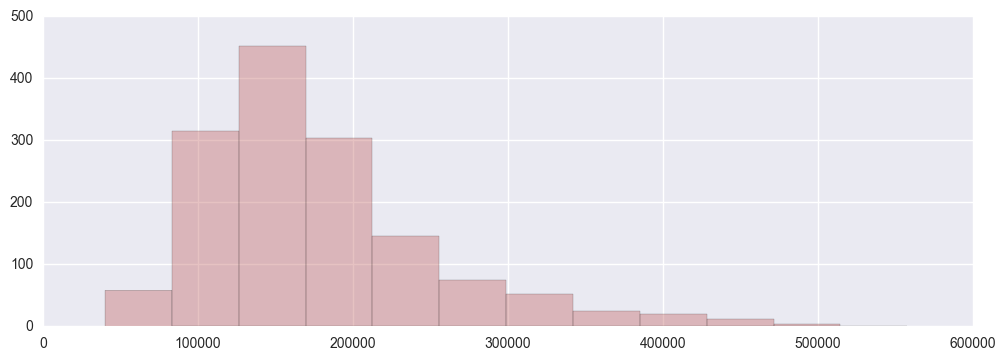

In [12]:
plt.hist(result_last['SalePrice'], bins=12, color=sns.desaturate("indianred", .8), alpha=.4)

In [13]:
#ensemble函数
class Ensemble(object):
    def __init__(self, n_folds, stacker, base_models):
        self.n_folds = n_folds
        self.stacker = stacker
        self.base_models = base_models

    def fit_predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(KFold(len(y), n_folds=self.n_folds, shuffle=True, random_state=2016))

        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))

        for i, clf in enumerate(self.base_models):
            S_test_i = np.zeros((T.shape[0], len(folds)))

            for j, (train_idx, test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                # y_holdout = y[test_idx]
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_holdout)[:]
                S_train[test_idx, i] = y_pred
                S_test_i[:, j] = clf.predict(T)[:]

            S_test[:, i] = S_test_i.mean(1)

        self.stacker.fit(S_train, y)
        y_pred = self.stacker.predict(S_test)[:]
        return y_pred